In [12]:
import pandas as pd
import re
from wordcloud import WordCloud
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

cleaned_df = pd.read_csv('./Cleaned_Data.csv')
cleaned_df = cleaned_df.dropna()
cleaned_df.head()

,id,label,tweet
0,1,0,user father dysfunctional selfish kids dysfunc...
1,2,0,user thanks lyft credit cause offer wheelchair...
2,3,0,majesty
3,4,0,model take time
4,5,0,factsguide society motivation


### Plotting the words greatly impacting good and bad separately

In [13]:
def plot_words(df):
    all_words = " ".join(df['tweet'])
    wordcloud = WordCloud(width = 800, height = 600, random_state = 20, max_font_size = 100).generate(all_words)
    plt.figure(figsize = (10,7))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

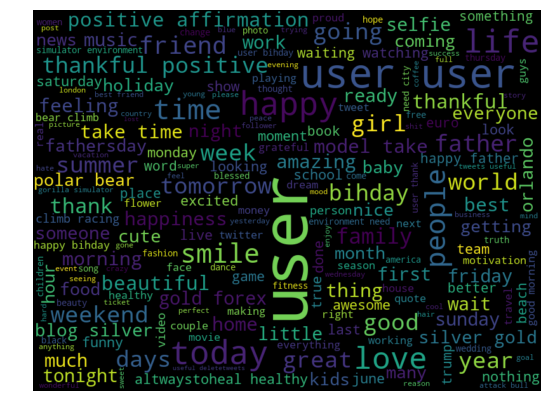

In [16]:
df_pos = cleaned_df[cleaned_df['label'] == 0]
plot_words(df_pos)

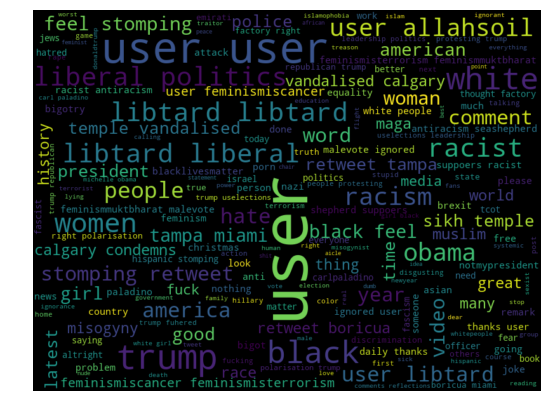

In [17]:
df_neg = cleaned_df[cleaned_df['label'] == 1]
plot_words(df_neg)

In [18]:
def extract_hashtags(tweets):
    hashtags_list = []
    for i in tweets:
        ht = re.findall(r"#(\w+)", i)
        hashtags_list.append(ht)
    return hashtags_list;


def plot_hashtag(dataframe):
    b = nltk.FreqDist(dataframe)
    tweet_count = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
    few_hashtags = tweet_count.nlargest(columns="Count", n = 15)
    plt.figure(figsize=(16,5))
    ax = sns.barplot(data=few_hashtags, x= "Hashtag", y = "Count")
    ax.set(ylabel = 'Count')
    plt.show()
    return tweet_count;

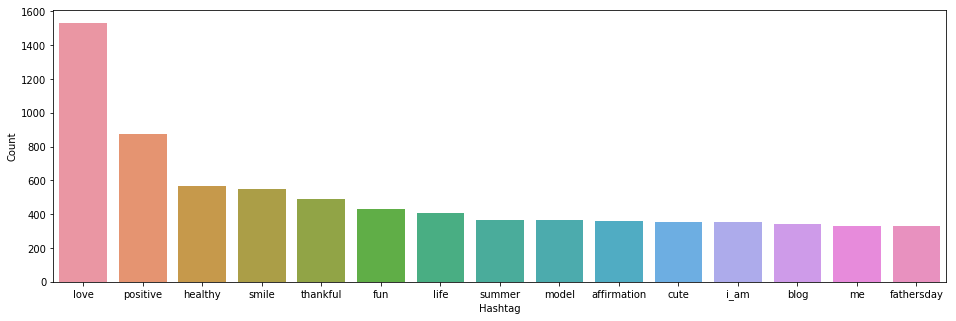

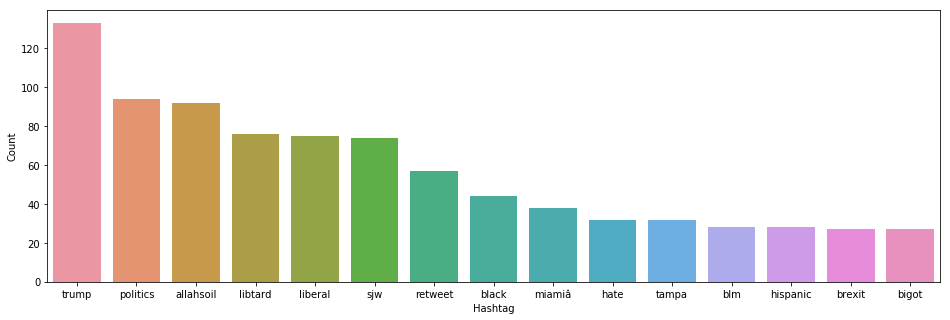

In [22]:
df = pd.read_csv("./train_E6oV3lV.csv")

normal_ht = sum(extract_hashtags(df['tweet'][df['label'] == 0]),[])
neg_ht = sum(extract_hashtags(df['tweet'][df['label'] == 1]),[])

pos_count = plot_hashtag(normal_ht)
neg_count = plot_hashtag(neg_ht)